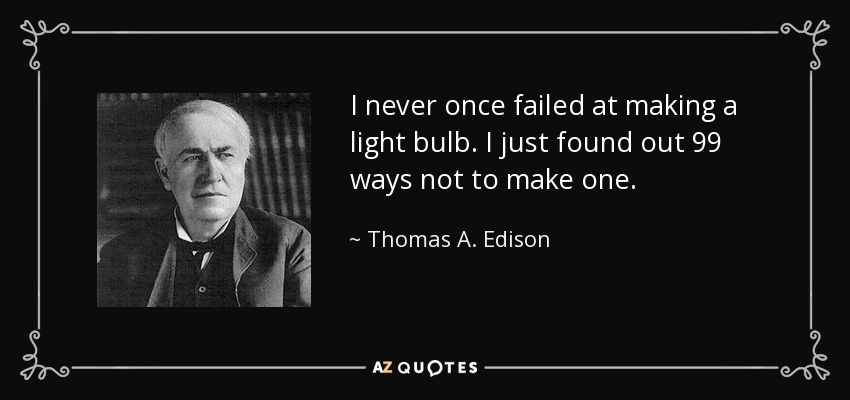

In [126]:
'''
Created on Feb 16, 2023
k Means Clustering 
Machine Learning in Action
@author: Emil.io
'''

# Shout out to YouTube, Stackoverflow and Chat GPT 


from IPython import display
Edison = display.Image("https://www.azquotes.com/picture-quotes/quote-i-never-once-failed-at-making-a-light-bulb-i-just-found-out-99-ways-not-to-make-one-thomas-a-edison-139-98-91.jpg")
Edison


In [2]:
#importing libraries
import pandas as pd
import numpy as np 
from  math import sqrt
import random
import matplotlib.pyplot as plt


In [3]:
#reading the data
penguins = pd.read_csv('penguins.csv')
penguins = penguins[['BodyMass_g','Delta15N']] # selecting the columns we are going to examine
penguins = penguins.dropna() # removing NaN values
penguins # viewing the data we have selected 


,BodyMass_g,Delta15N
1,3800.0,8.94956
2,3250.0,8.36821
4,3450.0,8.76651
5,3650.0,8.66496
6,3625.0,9.18718
...,...,...
338,4925.0,7.99184
340,4850.0,8.41151
341,5750.0,8.30166
342,5200.0,8.24246


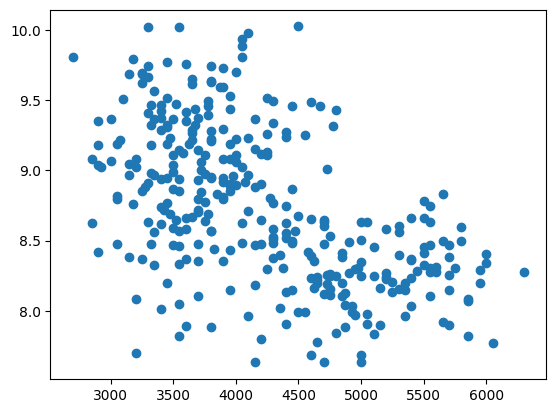

In [107]:
#scatter plot of the data
plt.scatter(penguins["BodyMass_g"],penguins["Delta15N"]) 

In [108]:
#selecting random centroids
K=3 #assigning klusters
centroids = (penguins.sample(n=K)) #assigning random centroids
centroids

,BodyMass_g,Delta15N
230,4650.0,8.19579
289,5550.0,8.63551
118,3350.0,8.96436


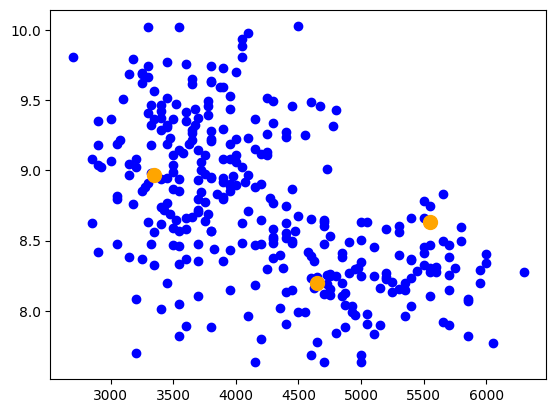

In [109]:
#scatterplot with the centroids
plt.scatter(penguins["BodyMass_g"],penguins["Delta15N"],c='blue') 
plt.scatter(centroids["BodyMass_g"],centroids["Delta15N"],c='orange',s = 100) # scatterplot of the data with random centroids

In [110]:
def euclidean_distance(vecA, vecB):     #Calculate the Euclidean distance between two points
    return np.sqrt(np.sum((vecA - vecB) ** 2))
# Select the values we want to examine
penguins1 = penguins[['BodyMass_g','Delta15N']]

In [111]:
def autoNorm(penguins1):
    minVals = penguins1.min(0) #gives the  minimum values of all columns
    #print(minVals)
    maxVals = penguins1.max(0) #gives the  maximum values of all columns
    #print(maxVals)
    ranges = maxVals - minVals # determins what the ranges for each column by calculating (max-min)
    #print(ranges)
    normDataSet = np.zeros(np.shape(penguins1)) # creates a zero matrix of the same size as penguins df 
    #print(normDataSet)
    m = penguins1.shape[0] # counts the amount of rows in penguins1
    #print(m)
    normDataSet = penguins1 - np.tile(minVals, (m, 1)) # calculates the (actual value less min value) 
    #print(normDataSet)
    normDataSet = normDataSet/np.tile(ranges, (m, 1))  # divides the normdataset value by the range value to get a range [:1]
    #print(normDataSet)
    
    #print sanity check 
    return normDataSet

penguins1 = autoNorm(penguins1)

In [112]:
#selecting random centroids for the normalized data
K=3
centroids = (penguins1.sample(n=K))
centroids

,BodyMass_g,Delta15N
231,0.791667,0.197210
336,0.604167,0.170860
58,0.041667,0.604444


In [113]:
def assign_clusters(penguins, centroids): # Assign each sample to the closest centroids
    clusters = list() #creating an empty list 
    for i, row in penguins.iterrows(): #creating a for loop to iterrate thru the rows
        distances = list() #creating a new empty list
        for j, rowcent in centroids.iterrows():  #creating a for loop to iterrate thru the rows in centroids

           distances.append(euclidean_distance(row[['BodyMass_g',"Delta15N"]],rowcent[['BodyMass_g',"Delta15N"]])) #appends the eucalidian distance between a coresponding row with its centroid
           #it will have as many values as centroids 
 
        cluster = np.argmin(distances) #retursn the index of the smallest distance between the value and 
        #all centroids and in a nutshel tells me which centroid is the closest to the value 
        
        clusters.append(cluster) #append which centroid each row belongs to 
    return clusters

clusters = assign_clusters(penguins1, centroids)



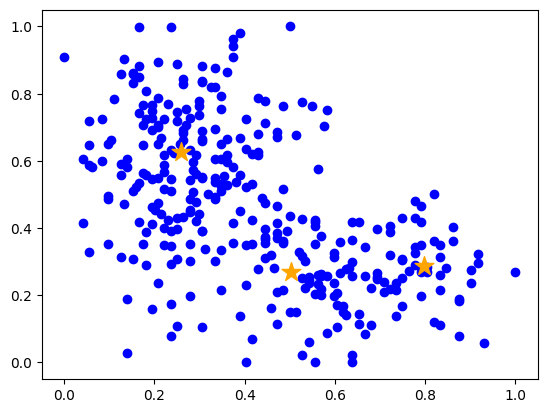

In [114]:
def update_centroids(penguins1, clusters): #updating the centroids dependend of the average distance for each data point in the df
    df = penguins1
    df["Clusters"] = clusters
    new_centroids = df.groupby(["Clusters"], as_index=False)[['BodyMass_g',"Delta15N"]].mean()
    return new_centroids
new_centroids = update_centroids(penguins1, clusters)
new_centroids

plt.scatter(penguins1["BodyMass_g"],penguins1["Delta15N"],c='blue')
plt.scatter(new_centroids["BodyMass_g"],new_centroids["Delta15N"],marker = "*", c='orange',s = 200)

In [118]:

def kmeans(penguins,centroids,clusters): # run K-means algorithm
    old_clusters= np.zeros(np.shape(clusters))
    truth = True
    while truth: # making sure the centroids are the absolute centroids and the klusters are the absolute clusters
        old_clusters = clusters 
        clusters = assign_clusters(penguins, centroids)
        centroids = update_centroids(penguins, clusters)
        if old_clusters == clusters:
            truth = False
    return clusters, centroids

clusters_ultimate, centroids_ultimate = kmeans(penguins1,new_centroids,clusters)
#print(clusters_ultimate)
#print(centroids_ultimate)



In [119]:
def calculate_tss(penguins, clusters, centroids): #calculating total sum of squares
    penguins['Cluster'] = clusters
    # Calculate the mean of the data for each dimension
    alltogether = pd.merge(penguins,centroids,how='inner',left_on='Cluster',right_on='Clusters') #merging the penguins df and centroids df,based ot cluster and "Clusters" column, providing the centroids to each row of data
    # by merging this way every row of data, now also has the values of its coresponing centroid, not only the classification
    finaldistances = [] # creating an empty list
    
    for i, row in alltogether.iterrows():  # checking earch data row 
        vecA = row[["BodyMass_g_x","Delta15N_x"]] #takes the values of the data 
        vecB = row[["BodyMass_g_y","Delta15N_y"]] #takes the value of the corresponing centroids
        vecB["BodyMass_g_x"] = vecB["BodyMass_g_y"]
        vecB["Delta15N_x"] = vecB["Delta15N_y"]
        vecB = vecB[["BodyMass_g_x","Delta15N_x"]]
        # all three rows rename the column headers
        pm = euclidean_distance(vecA,vecB) # calculating the distance 
        finaldistances.append(pm) # appending the distance 
        
    #print(finaldistances)
    tss = sum(finaldistances)
    
    return tss

    
    
test = calculate_tss(penguins1,clusters_ultimate,centroids_ultimate)
test

49.85163786925844

In [124]:
# implementing the "elbow method" to determine the optimal number of clusters for a df
def elbow_method(K): #shows the relationship between the number of clusters (K) and the sum of squared errors SSE
    penguins = pd.read_csv('penguins.csv') #reading in the data
    penguins = penguins[['BodyMass_g','Delta15N']] #selecting the columns
    penguins = penguins.dropna() #removing NaN rows
    penguins1 = autoNorm(penguins) #normalizingthe new df 
    
    
    elbowlist_k = [] # creating empty lists
    elbowlist_tss = []
    

    for i in range(2,K,1): # running a for loop 
        centroids = (penguins1.sample(n=K)) # selects random data points from penguins1 df using the sample method
        clusters = assign_clusters(penguins1, centroids) # assign each data point in df to the closest centroid 
        new_centroids = update_centroids(penguins1, clusters) #Calculates new centroids based on the mean of the data points in each cluster 
        clusters_ultimate, centroids_ultimate = kmeans(penguins1,new_centroids,clusters) #runs kmeans function with the new centroids and clusters to obtain the final clusters and centroids.
        calculatedtss = calculate_tss(penguins1,clusters_ultimate,centroids_ultimate) #Calculates the total sum of squares 
        elbowlist_k.append(i) #Appends the number of clusterso the elbowlist_k list 
        elbowlist_tss.append(calculatedtss) #final output of the function is the "lbowlist_k and elbowlist_tss lists, which contain the number of clusters and the corresponding TSS values
        
    return elbowlist_k, elbowlist_tss        

x, y = elbow_method(10)
print(x)
print(y)



[2, 3, 4, 5, 6, 7, 8, 9]
[30.131061571898982, 29.359660200501086, 32.74802670555943, 28.617131190856934, 28.75388789106577, 29.70185703736997, 29.029252826482256, 29.207007820190217]


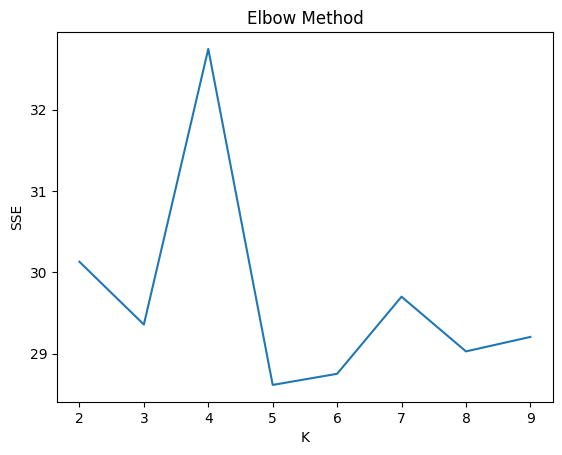

In [125]:
# creating Elbow Method plot
plt.plot(x,y)
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

